# **Practical Lab 7** #

In this notebook, we aim to evaluate a model for MNIST classification. We begin by downloading the MNIST dataset and exploring its structure. The goal is to classify handwritten digits into a chosen number of classes, ranging from 3 to 10. We split the dataset into train, validation, and test sets, choose a suitable model, and evaluate its performance.

In [19]:
from sklearn.datasets import fetch_openml

In [20]:
# Download MNIST data
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')

In [21]:
type(mnist)


sklearn.utils._bunch.Bunch

In [22]:
list(mnist)

['data',
 'target',
 'frame',
 'categories',
 'feature_names',
 'target_names',
 'DESCR',
 'details',
 'url']

In [23]:
X, y = mnist['data'], mnist['target']


**Exploratory Data Analysis**

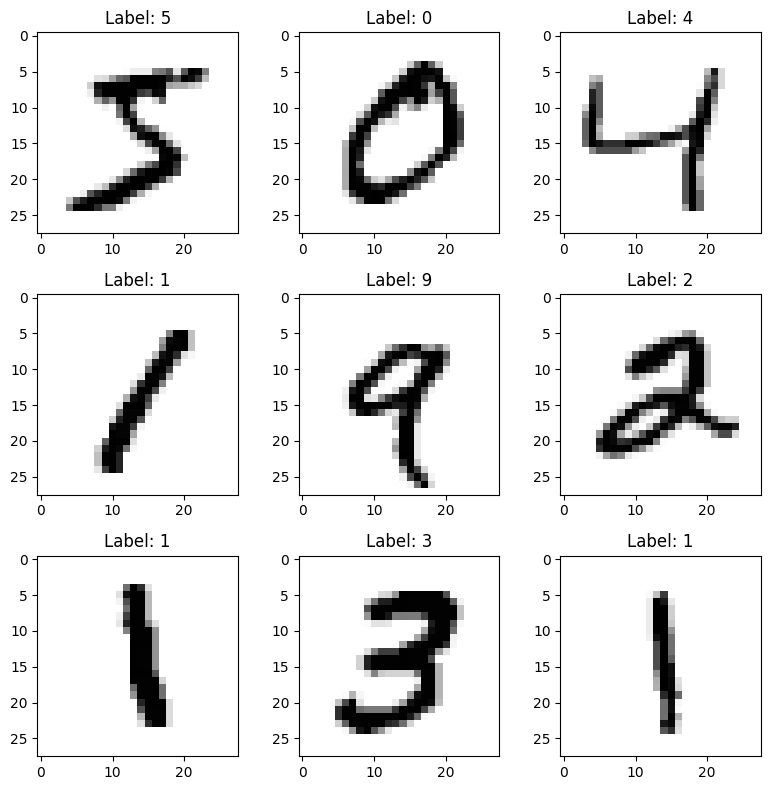

In [24]:
import matplotlib.pyplot as plt

# Display some sample images
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='binary')
    ax.set_title(f'Label: {y[i]}')
plt.tight_layout()
plt.show()


Reduce number of classes

In [25]:
import numpy as np

# Choose classes 0, 1, and 2
classes_to_keep = ['0', '1', '2']
indices_to_keep = np.isin(y, classes_to_keep)
X = X[indices_to_keep]
y = y[indices_to_keep]


Split Dataset

In [26]:
from sklearn.model_selection import train_test_split

# Split dataset into train-validation-test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


Model

In [27]:
from sklearn.linear_model import SGDClassifier

# Initialize and fit the SGD Classifier with 'log' loss
sgd_clf = SGDClassifier(loss='log', random_state=42)
sgd_clf.fit(X_train, y_train)


c:\Users\raj\machine_learning\CSCN8010-Labs\venv\CSCN8010_classic_ml1\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log', random_state=42)

Evaluation on the validation dataset


Accuracy: 0.9862174578866769
Confusion Matrix:
[[1024    2    7]
 [   1 1169   14]
 [  14    7 1027]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1033
           1       0.99      0.99      0.99      1184
           2       0.98      0.98      0.98      1048

    accuracy                           0.99      3265
   macro avg       0.99      0.99      0.99      3265
weighted avg       0.99      0.99      0.99      3265



c:\Users\raj\machine_learning\CSCN8010-Labs\venv\CSCN8010_classic_ml1\Lib\site-packages\sklearn\linear_model\_base.py:440: RuntimeWarning: invalid value encountered in divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))
c:\Users\raj\machine_learning\CSCN8010-Labs\venv\CSCN8010_classic_ml1\Lib\site-packages\sklearn\linear_model\_base.py:440: RuntimeWarning: invalid value encountered in divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))


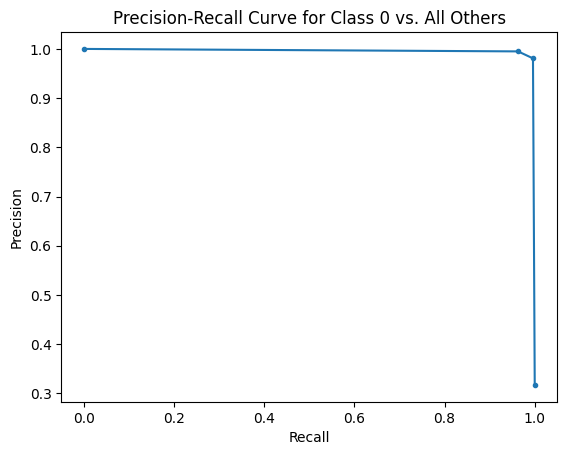

In [28]:
import numpy as np

# Predictions on validation set
y_pred_val = sgd_clf.predict(X_val)

# Accuracy
accuracy = accuracy_score(y_val, y_pred_val)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_val)
print("Confusion Matrix:")
print(conf_matrix)

# Precision, recall, F1-score
report = classification_report(y_val, y_pred_val)
print("Classification Report:")
print(report)


# Find indices of NaN values
nan_indices = np.isnan(sgd_clf.predict_proba(X_val)[:, 0])

# Remove NaN values from predictions and ground truth
y_val_cleaned = y_val[~nan_indices]
probas_pred_cleaned = sgd_clf.predict_proba(X_val)[~nan_indices, 0]

# Calculate precision-recall curve for class 0 vs. all others
precision, recall, thresholds = precision_recall_curve(y_val_cleaned == '0', probas_pred_cleaned)

# Plot precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Class 0 vs. All Others')
plt.show()




Adjusting precision without retraining

In [29]:
# Adjust threshold to increase precision
threshold = 0.7
y_pred_adjusted_precision = (sgd_clf.predict_proba(X_val)[:, 0] > threshold).astype(int)
new_precision = accuracy_score(y_val == '0', y_pred_adjusted_precision)
print("New Precision (Class 0):", new_precision)


New Precision (Class 0): 0.9849923430321592


c:\Users\raj\machine_learning\CSCN8010-Labs\venv\CSCN8010_classic_ml1\Lib\site-packages\sklearn\linear_model\_base.py:440: RuntimeWarning: invalid value encountered in divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))


Adjusting recall without retraining

In [30]:
# Adjust threshold to increase recall
threshold = 0.3
y_pred_adjusted_recall = (sgd_clf.predict_proba(X_val)[:, 0] > threshold).astype(int)
new_recall = accuracy_score(y_val == '0', y_pred_adjusted_recall)
print("New Recall (Class 0):", new_recall)


New Recall (Class 0): 0.9908116385911179


c:\Users\raj\machine_learning\CSCN8010-Labs\venv\CSCN8010_classic_ml1\Lib\site-packages\sklearn\linear_model\_base.py:440: RuntimeWarning: invalid value encountered in divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))


Run on the test set and provide conclusions

In [31]:
# Predictions on test set
y_pred_test = sgd_clf.predict(X_test)

# Evaluate on test set
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9859154929577465


The test accuracy of approximately 98.59% indicates that the model performs very well on unseen data, suggesting that it generalizes effectively beyond the training and validation datasets. This high accuracy level suggests that the model has learned meaningful patterns from the data and can accurately classify digits from the MNIST dataset.